### Laboratorium 5 - zadania - transformacja Hougha

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Zadanie 1

Zbadaj wpływ parametrów transformacji Hougha na jakość detekcji prostych na przykładzie obrazu `norway`. Wykorzystaj ulubiony detektor krawędzi i zaprezentuj jego wynik przed użyciem transformacji Hougha. Zapoznaj się z dokumentacją funkcji [`cv2.HoughLines`](https://docs.opencv.org/4.5.3/dd/d1a/group__imgproc__feature.html#ga46b4e588934f6c8dfd509cc6e0e4545a), zwłaszcza parametrami sterującymi rozdzielczością `rho`, `theta` oraz progiem (`threshold`). Błędnie dobrany próg może szczególnie negatywnie wpłynąć na wyniki.

Zacznij od znalezienia odpowiednich parametrów detektora krawędzi - jeśli na tym etapie wyniki będą słabe, to dalej będzie tylko gorzej (_garbage-in, garbage-out_) - ale nie skupiaj się na badaniu ich wpływu na wyniki.

Zadanie _nie_ polega na zrobieniu grid searcha parametrów transformacji Hougha, tylko na zrozumieniu zachowania parametrów `rho` i `theta`, oraz wpływu progu.

Ostateczny rezultat zaprezentuj w postaci odcinków naniesionych na kopię obrazu wejściowego (patrz komórka `[3]`).

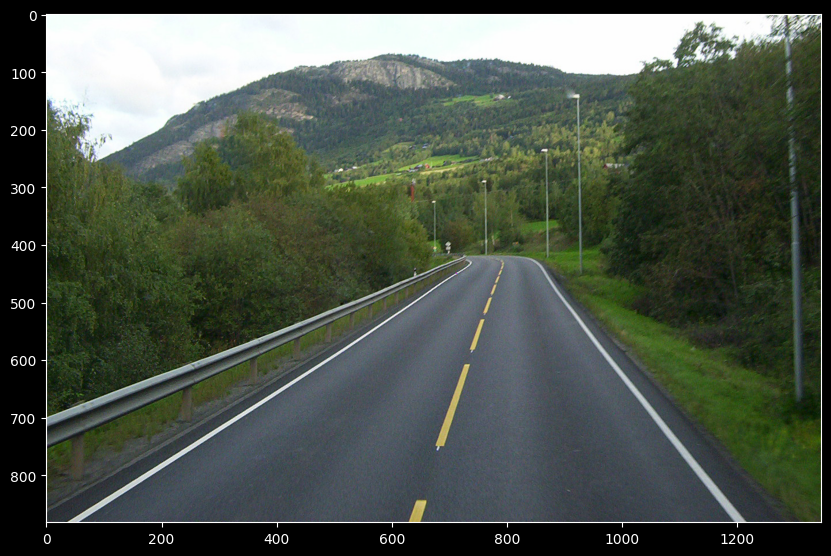

In [2]:
norway = cv2.imread('dane5/norway.jpg')
plt.subplots(1, 1, figsize=(10,10))[1].imshow(norway[..., ::-1]);

In [3]:
def rhotheta2xy(line):
  # konwersja parametrów prostej w układzie rho-theta do odcinka w układzie kartezjańskim
  # wynik można użyć jako argumenty funkcji cv2.line
  rho, theta = line[0]
  a = np.cos(theta)
  b = np.sin(theta)
  x0 = a*rho
  y0 = b*rho
  x1 = int(x0 + 5000*(-b))
  y1 = int(y0 + 5000*(a))
  x2 = int(x0 - 5000*(-b))
  y2 = int(y0 - 5000*(a))
  return x1, y1, x2, y2

Rozwiązanie:

In [4]:
filtered_norway = cv2.GaussianBlur(norway, (5, 5), 0)
# filtered_img = cv2.bilateralFilter(coins_noise, 13, 75, 75)

threshold1_values = [100, 120, 150, 170, 200, 250, 300]
threshold2_values = [120, 150, 170, 200, 250, 300, 350]

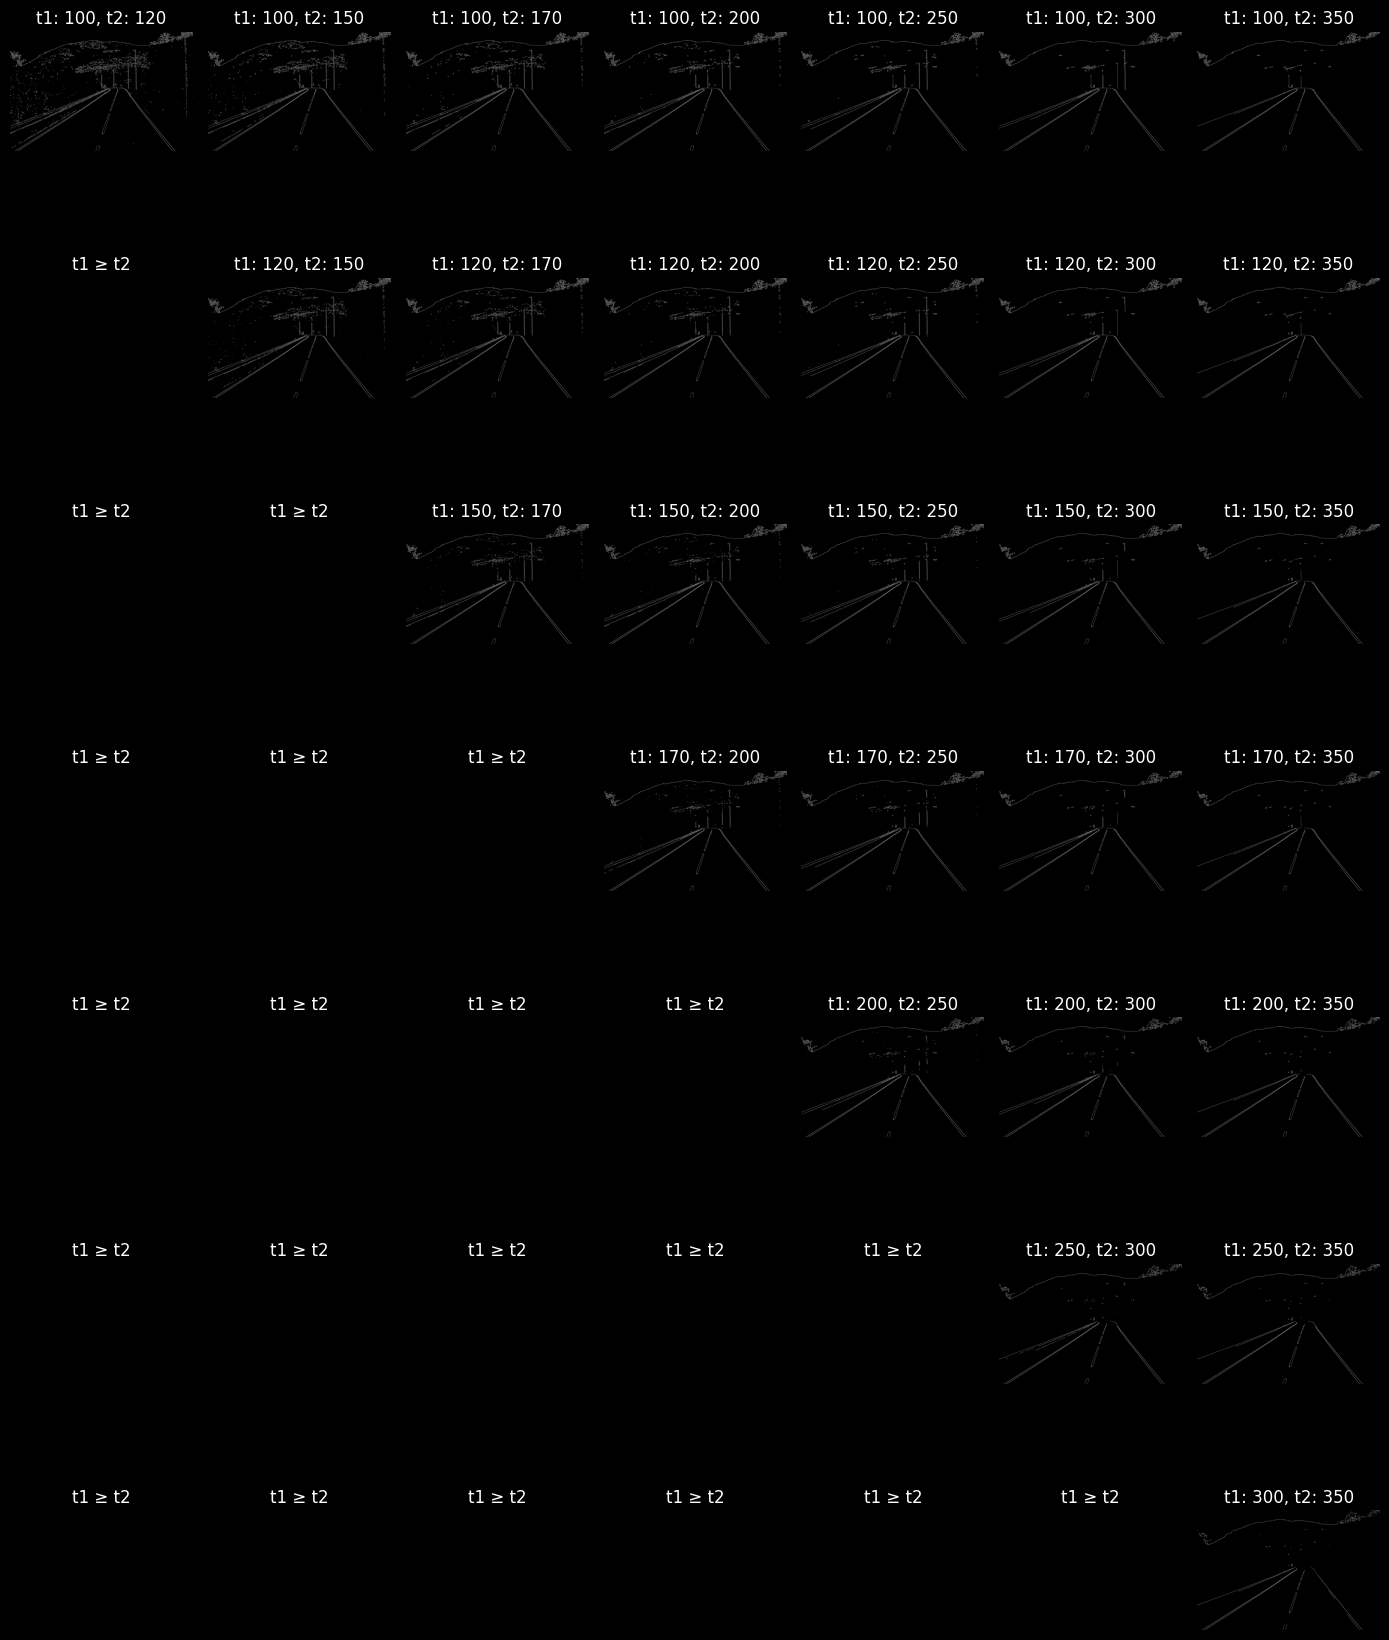

In [5]:
plt.figure(figsize=(14, 18))
plot_num = 1

for t1 in threshold1_values:
  for t2 in threshold2_values:
    if t1 >= t2:
      plt.subplot(len(threshold1_values), len(threshold2_values), plot_num)
      plt.imshow(np.zeros_like(filtered_norway), cmap='gray')
      plt.title(f't1 ≥ t2')
      plt.axis('off')
      plot_num += 1
      continue

    else:
      edges = cv2.Canny(filtered_norway, threshold1=t1, threshold2=t2)
      
      plt.subplot(len(threshold1_values), len(threshold2_values), plot_num)
      plt.imshow(edges, cmap='gray')
      plt.title(f't1: {t1}, t2: {t2}')
      plt.axis('off')
      plot_num += 1

plt.tight_layout()
plt.show()

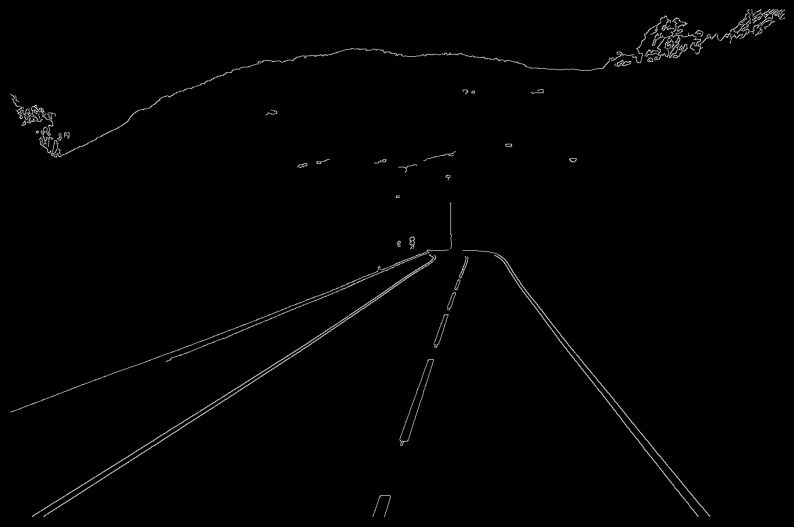

In [6]:
norway_edges = cv2.Canny(filtered_norway, 150, 350)

plt.figure(figsize=(10, 10))
plt.imshow(norway_edges, cmap='gray')
plt.axis('off')
plt.show()

In [7]:
def test_hough_params_rho_theta(image, edges, rho_values, theta_values, threshold, figsize=(18, 40), line_color=(0, 0, 255)):
  
  fig, axes = plt.subplots(len(rho_values), len(theta_values), figsize=figsize)

  for i, rho in enumerate(rho_values):
    for j, theta in enumerate(theta_values):

      lines = cv2.HoughLines(edges, rho, theta, threshold)

      img_with_lines = image.copy()

      for line in lines:
        x1, y1, x2, y2 = rhotheta2xy(line)
        cv2.line(img_with_lines, (x1, y1), (x2, y2), line_color, 2)

      ax = axes[i, j]
      ax.imshow(img_with_lines[..., ::-1])
      ax.set_title(f'r={rho}, t={round(theta, 2)}')
      ax.axis('off')  

  plt.show()

In [8]:
def test_hough_params_rho_thresh(image, edges, rho_values, theta, threshold_values, figsize=(18, 20), line_color=(0, 0, 255)):
  
  fig, axes = plt.subplots(len(rho_values), len(threshold_values), figsize=figsize)

  for i, rho in enumerate(rho_values):
    for j, threshold in enumerate(threshold_values):

      lines = cv2.HoughLines(edges, rho, theta, threshold)

      img_with_lines = image.copy()

      for line in lines:
        x1, y1, x2, y2 = rhotheta2xy(line)
        cv2.line(img_with_lines, (x1, y1), (x2, y2), line_color, 2)

      ax = axes[i, j]
      ax.imshow(img_with_lines[..., ::-1])
      ax.set_title(f'r={rho}, th={threshold}')
      ax.axis('off')  

  plt.show()

In [ ]:
rho_values = [1, 1.5, 1.75, 2, 3]
theta_values = [np.pi/180, np.pi/90, np.pi/45, np.pi/30, np.pi/15]
threshold = 100

test_hough_params_rho_theta(norway, norway_edges, rho_values, theta_values, threshold, figsize=(18, 16))

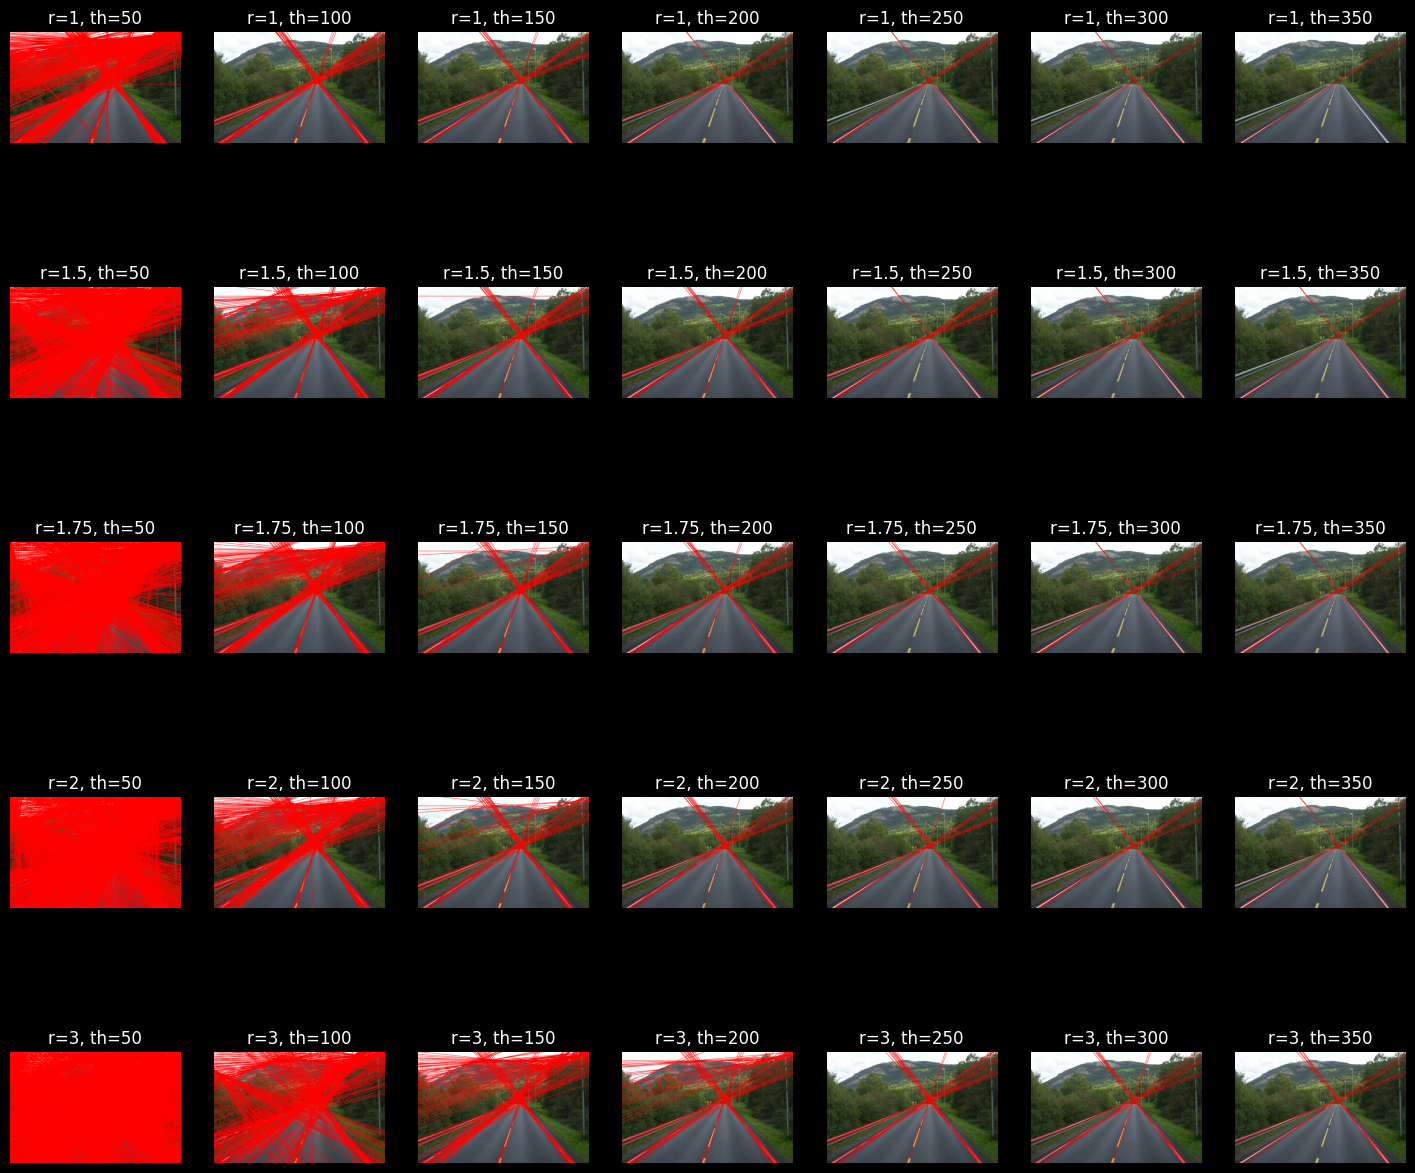

In [ ]:
rho_values = [1, 1.5, 1.75, 2, 3]
theta = np.pi/180
threshold_values = [50, 100, 150, 200, 250, 300, 350]

test_hough_params_rho_thresh(norway, norway_edges, rho_values, theta, threshold_values, figsize=(18, 16))

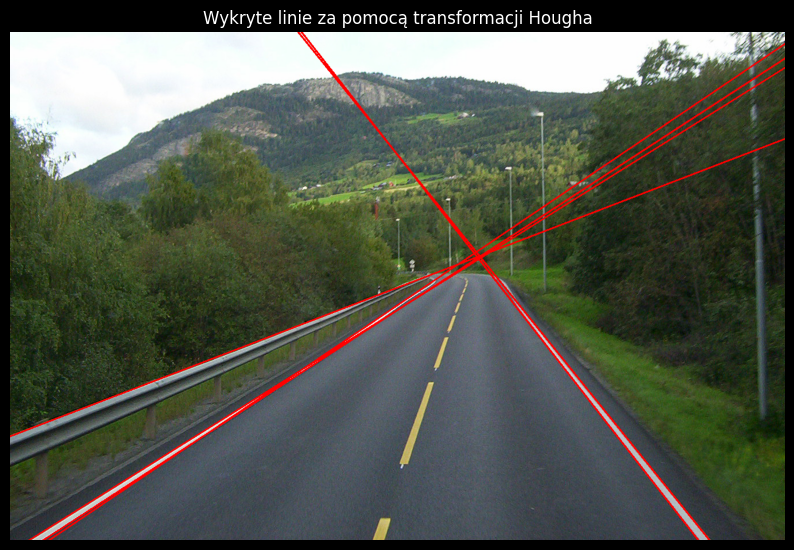

In [ ]:
rho = 2               # Rozdzielczość rho w pikselach
theta = np.pi / 180   # Rozdzielczość theta w radianach (1 stopień)
threshold = 350       # Minimalna liczba krawędzi potrzebna do wykrycia linii

# Zastosowanie transformacji Hougha
norway_lines = cv2.HoughLines(norway_edges, rho, theta, threshold)

# Tworzenie kopii oryginalnego obrazu do rysowania linii
norway_with_lines = norway.copy()

for line in norway_lines:
  x1, y1, x2, y2 = rhotheta2xy(line)
  cv2.line(norway_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.figure(figsize=(10,10))
plt.imshow(norway_with_lines[..., ::-1])
plt.axis('off')
plt.show()

#### Zadanie 2

Dany jest obraz `pillbox`. Wykorzystaj transformację Hougha dla prostych, aby wykryć krawędzie między komórkami organizera.

Dla odmiany, w tym zadaniu nie jest istotne badanie parametrów ale wyłącznie końcowy wynik.

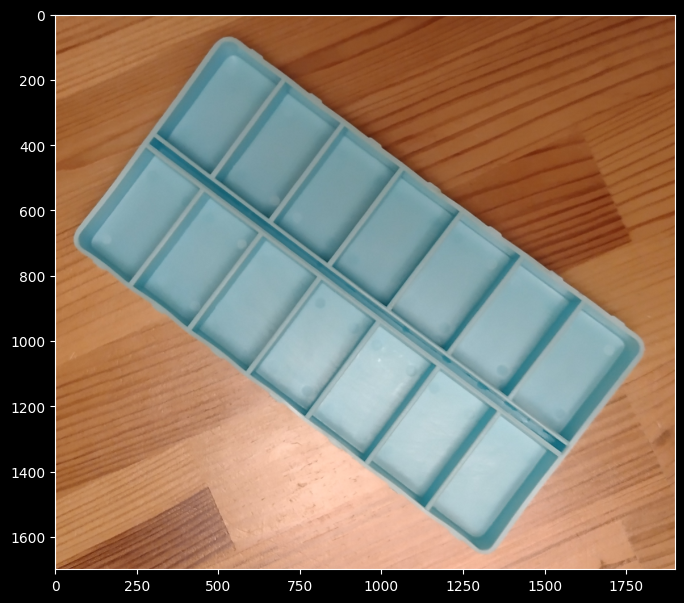

In [ ]:
pillbox = cv2.imread('dane5/pillbox.png')
plt.subplots(1, 1, figsize=(8,8))[1].imshow(pillbox[..., ::-1]);

Rozwiązanie:

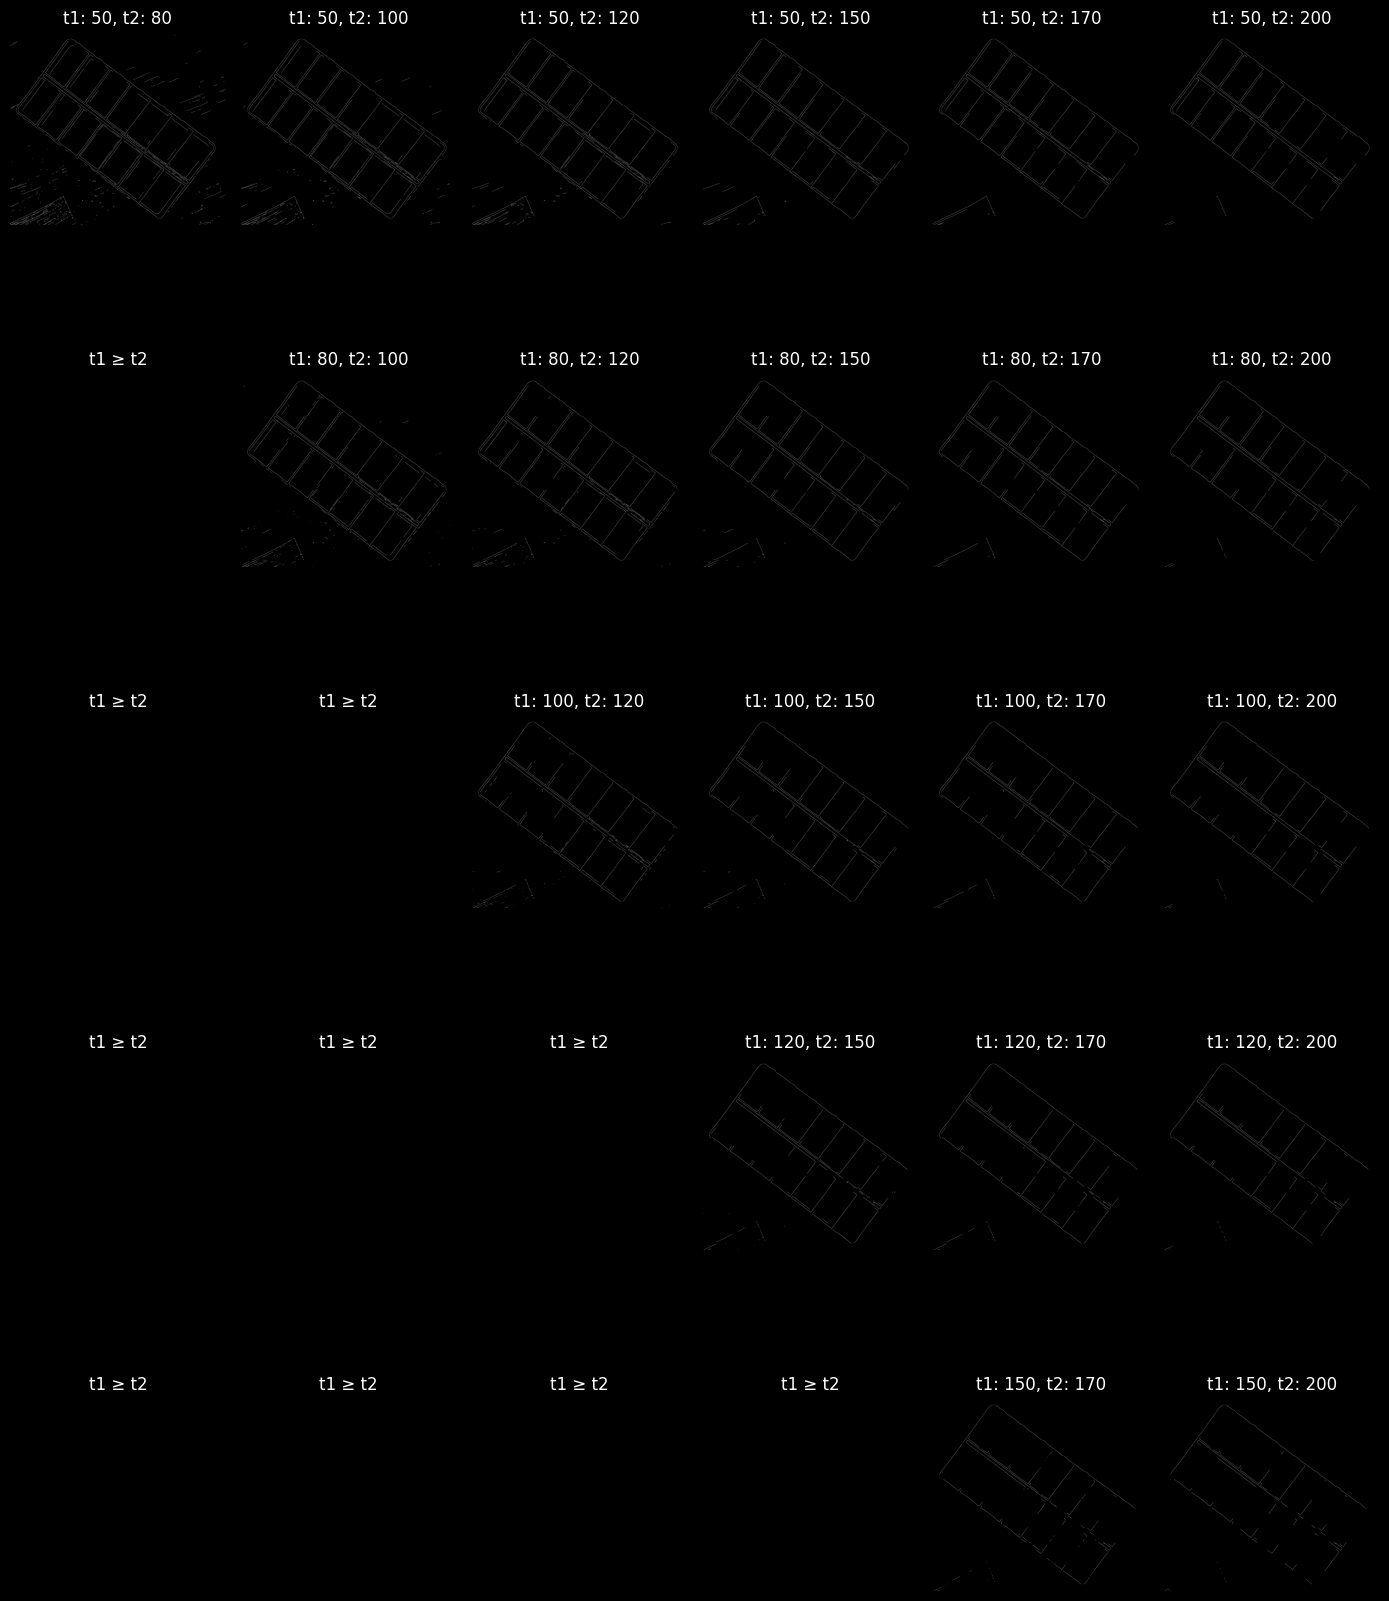

In [ ]:
filtered_pillbox = cv2.GaussianBlur(pillbox, (5, 5), 0)

threshold1_values = [50,  80, 100, 120, 150]
threshold2_values = [80, 100, 120, 150, 170, 200]

plt.figure(figsize=(14, 18))
plot_num = 1
for t1 in threshold1_values:
  for t2 in threshold2_values:
    if t1 >= t2:
      plt.subplot(len(threshold1_values), len(threshold2_values), plot_num)
      plt.imshow(np.zeros_like(filtered_pillbox), cmap='gray')
      plt.title(f't1 ≥ t2')
      plt.axis('off')
      plot_num += 1
      continue

    else:
      edges = cv2.Canny(filtered_pillbox, threshold1=t1, threshold2=t2)
      
      plt.subplot(len(threshold1_values), len(threshold2_values), plot_num)
      plt.imshow(edges, cmap='gray')
      plt.title(f't1: {t1}, t2: {t2}')
      plt.axis('off')
      plot_num += 1

plt.tight_layout()
plt.show()

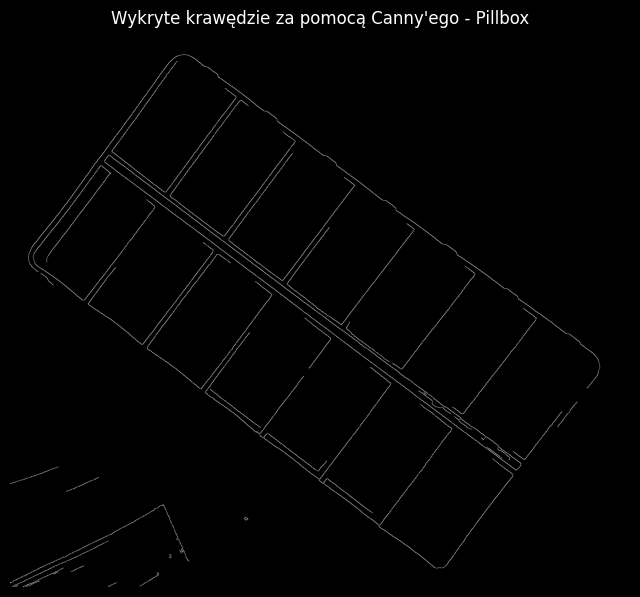

In [ ]:
pillbox_edges = cv2.Canny(filtered_pillbox, 50, 150)

plt.figure(figsize=(8,8))
plt.imshow(pillbox_edges, cmap='gray')
plt.axis('off')
plt.show()

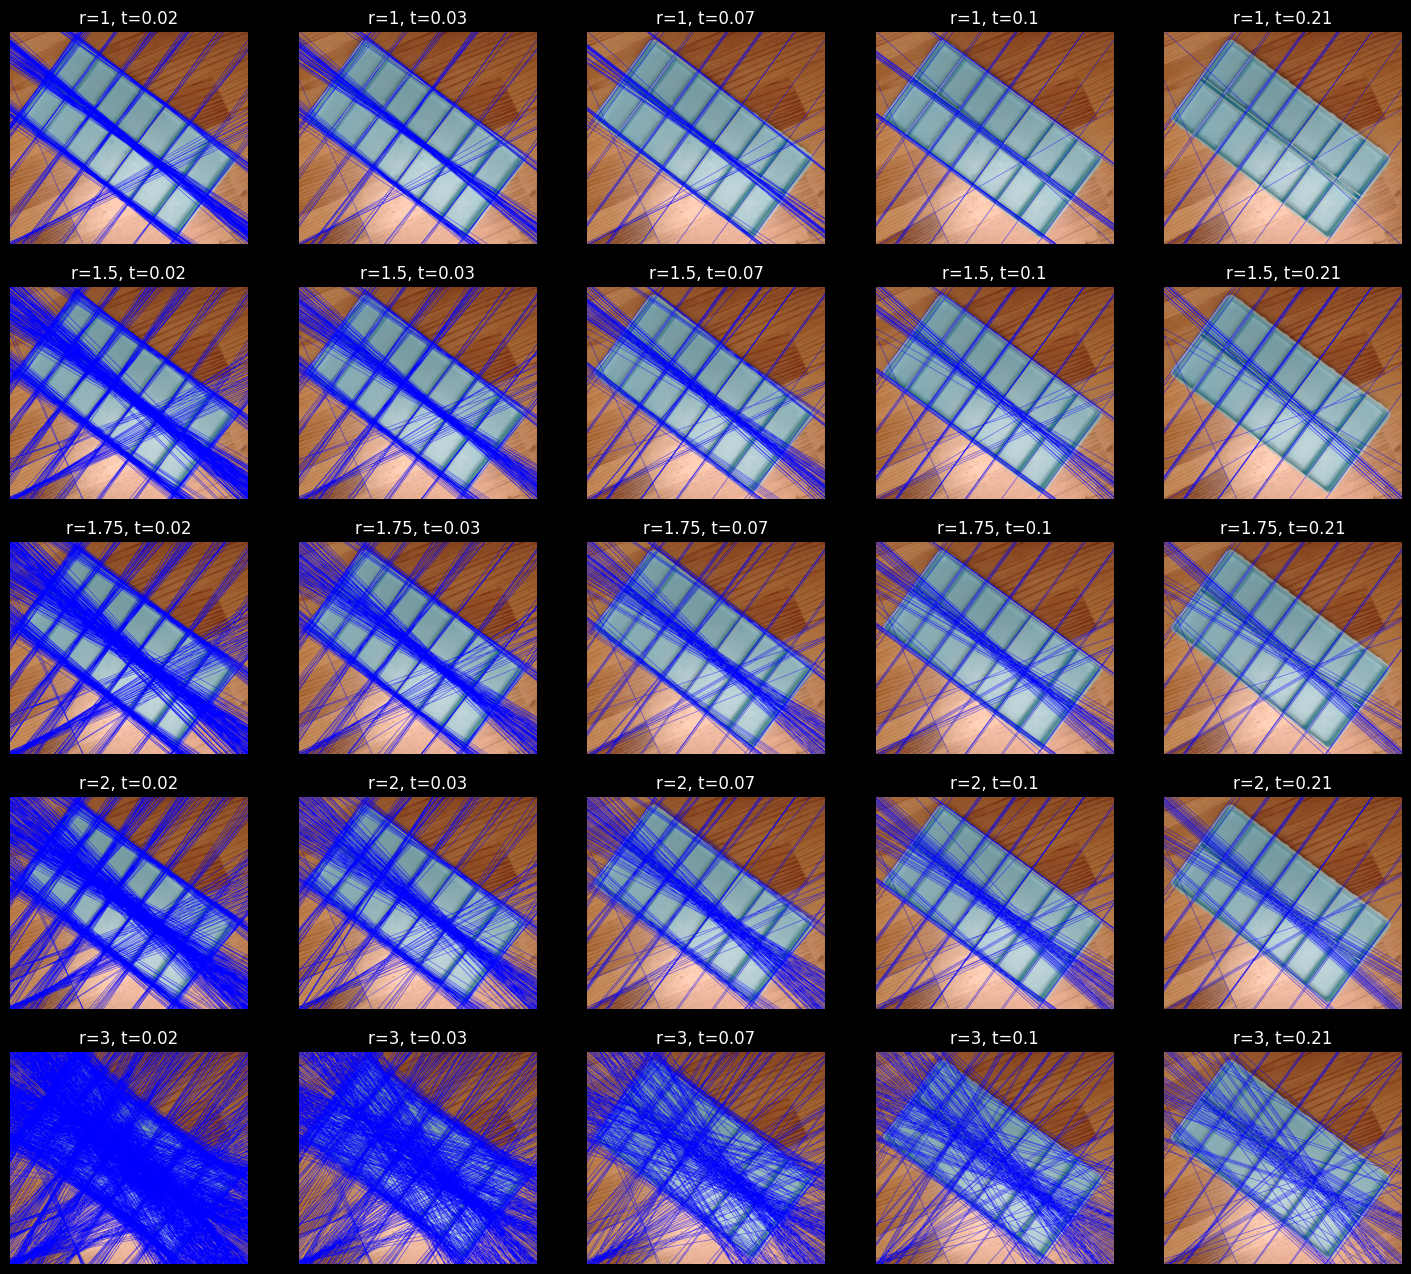

In [ ]:
rho_values = [1, 1.5, 1.75, 2, 3]
theta_values = [np.pi/180, np.pi/90, np.pi/45, np.pi/30, np.pi/15]
threshold = 100

test_hough_params_rho_theta(pillbox, pillbox_edges, rho_values, theta_values, threshold, figsize=(18, 16), line_color=(255, 0, 0))

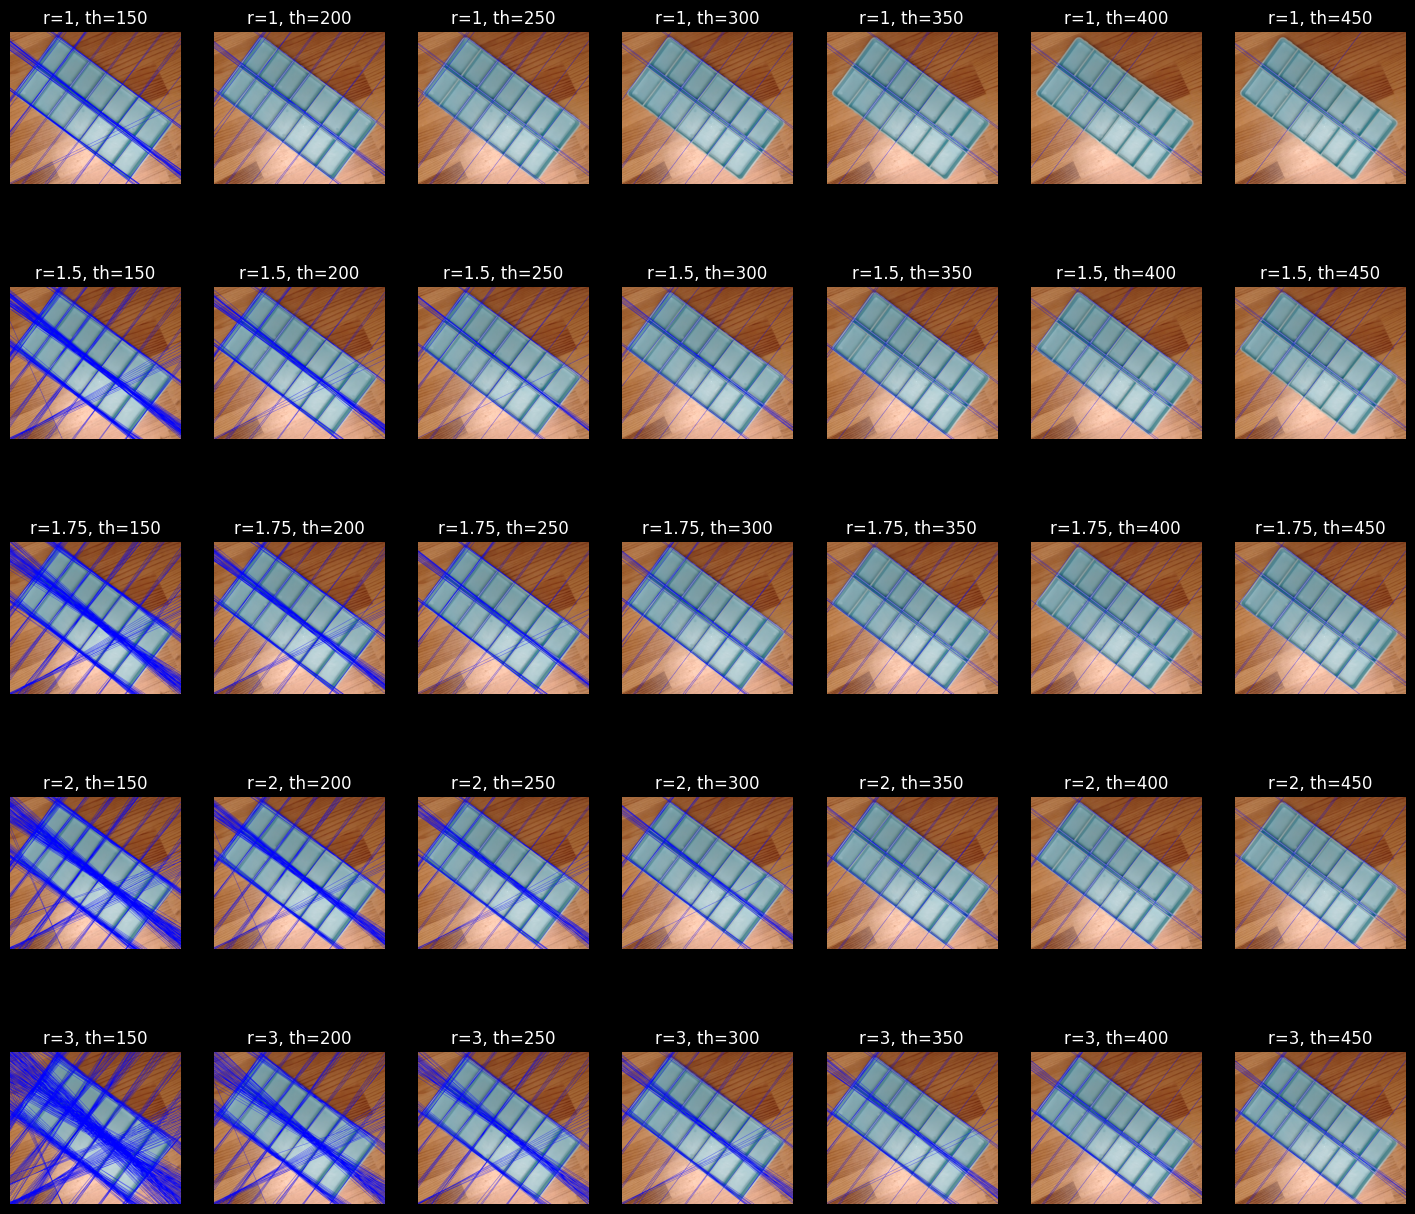

In [ ]:
rho_values = [1, 1.5, 1.75, 2, 3]
theta = np.pi/180
threshold_values = [150, 200, 250, 300, 350, 400, 450]

test_hough_params_rho_thresh(pillbox, pillbox_edges, rho_values, theta, threshold_values, figsize=(18, 16), line_color=(255, 0, 0))

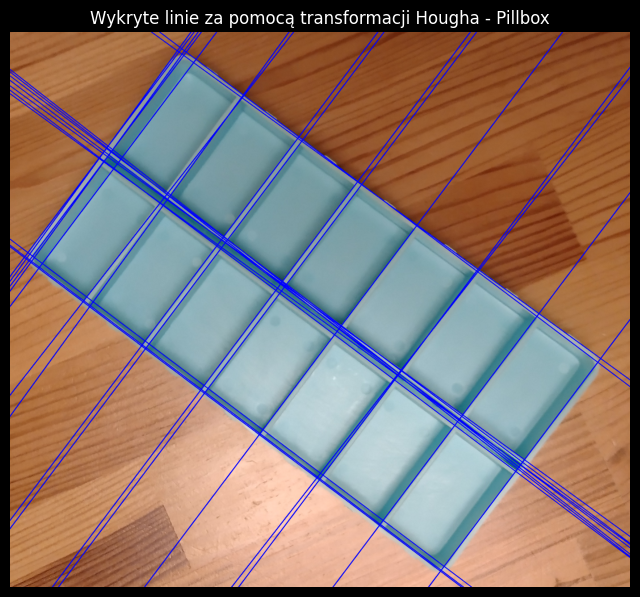

In [ ]:
rho_pillbox = 1
theta_pillbox = np.pi / 180
threshold_pillbox = 200

lines_pillbox = cv2.HoughLines(pillbox_edges, rho_pillbox, theta_pillbox, threshold_pillbox)

pillbox_with_lines = pillbox.copy()

for line in lines_pillbox:
  x1, y1, x2, y2 = rhotheta2xy(line)
  cv2.line(pillbox_with_lines, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.figure(figsize=(8,8))
plt.imshow(pillbox_with_lines[..., ::-1])
plt.axis('off')
plt.show()